# MLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mnist as mnist
from hgen import write_model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
set_random_seed(2)

In [3]:
# Reshape image data so each image is represented by one long array 
def prepare_input(arr):
    arr = arr.reshape(arr.shape[0], arr.shape[1] * arr.shape[2])
    
    # Convert to input float32
    arr = arr.astype('float32')

    # Normalise input in the range [-1, 1] 
    arr = (arr-127.5) / 127.5

    return arr

def mem_usage(numpy_arr):
    print('Uses {0:.2f} MB of memory'.format(numpy_arr.nbytes / 1024 / 1024))



In [4]:
X = mnist.train_images()
y = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

# Reshape and normalise input
X = prepare_input(X)
X_test = prepare_input(X_test)

In [5]:
num_classes = np.unique(y).shape[0]
input_size = X.shape[1]

# Convert class vectors to binary class matrices
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def train(model, model_name='model'):
    model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
    history = model.fit(X, y,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test))
    model.save_weights('models/{}.hdf5'.format(model_name))

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

def create_mlp_3_layers_32():
    inputs = Input(shape=(input_size,))
    x = Dense(32, name='hidden', activation='relu')(inputs)
    predictions = Dense(10, name='output', activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return { 'model': model, 'name': 'mpl_3_layers_32' }

mpl_3_layers_32 = create_mlp_3_layers_32()
mpl_3_layers_32_model = mpl_3_layers_32['model']
mpl_3_layers_32_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 32)                25120     
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


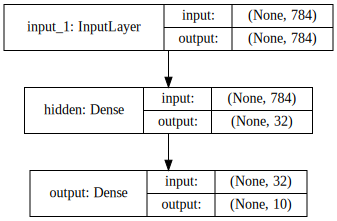

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(mpl_3_layers_32_model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
train(mpl_3_layers_32['model'], mpl_3_layers_32['name'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4755 - acc: 0.8550 - val_loss: 0.2948 - val_acc: 0.9140
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2878 - acc: 0.9152 - val_loss: 0.2654 - val_acc: 0.9192
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2449 - acc: 0.9292 - val_loss: 0.2232 - val_acc: 0.9339
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2193 - acc: 0.9354 - val_loss: 0.2123 - val_acc: 0.9384
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2016 - acc: 0.9407 - val_loss: 0.2272 - val_acc: 0.9348
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1871 - acc: 0.9452 - val_loss: 0.1815 - val_acc: 0.9473
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1756 - acc: 0.9475 - val_loss: 0.1801 - val_acc

In [10]:
write_model(mpl_3_layers_32_model, 'mpl_3_layers_32.h')

In [11]:
x = X_test[0]
x = np.expand_dims(x, axis=0)
x

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [12]:
y_pred = mpl_3_layers_32_model.predict(x)

In [13]:
for i in range(len(y_pred[0])):
    res = y_pred[0][i]
    print('ASSERT_EQ_FLOAT({0:.9f}, result[{1}]);'.format(res, i))

ASSERT_EQ_FLOAT(0.000001091, result[0]);
ASSERT_EQ_FLOAT(0.000000000, result[1]);
ASSERT_EQ_FLOAT(0.000027445, result[2]);
ASSERT_EQ_FLOAT(0.000085699, result[3]);
ASSERT_EQ_FLOAT(0.000000000, result[4]);
ASSERT_EQ_FLOAT(0.000000037, result[5]);
ASSERT_EQ_FLOAT(0.000000000, result[6]);
ASSERT_EQ_FLOAT(0.999881625, result[7]);
ASSERT_EQ_FLOAT(0.000003256, result[8]);
ASSERT_EQ_FLOAT(0.000000857, result[9]);
